In [14]:
import pandas as pd

df = pd.read_csv('car_prices.csv', on_bad_lines='skip').dropna()


In [15]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [16]:
# Select numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation matrix with selling price
correlation_with_price = df[numeric_columns].corr()['sellingprice'].sort_values(ascending=False)

print("\nCorrelation with Selling Price:")
print(correlation_with_price)

# Calculate covariance matrix with selling price 
covariance_with_price = df[numeric_columns].cov()['sellingprice'].sort_values(ascending=False)

print("\nCovariance with Selling Price:")
print(covariance_with_price)



Correlation with Selling Price:
sellingprice    1.000000
mmr             0.983492
year            0.578918
condition       0.535990
odometer       -0.577385
Name: sellingprice, dtype: float64

Covariance with Selling Price:
sellingprice    9.240904e+07
mmr             9.011935e+07
year            2.127061e+04
condition       4.862158e+03
odometer       -2.882822e+08
Name: sellingprice, dtype: float64


In [17]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Select features for the model (using numeric columns identified earlier)
X = df[numeric_columns].drop('sellingprice', axis=1)
y = df['sellingprice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nModel Performance Metrics:")
print(f"R-squared Score: {r2_score(y_test, y_pred):.4f}")
print(f"Root Mean Squared Error: ${np.sqrt(mean_squared_error(y_test, y_pred)):,.2f}")

# Print feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nFeature Importance:")
print(feature_importance.sort_values(by='Coefficient', ascending=False))



Model Performance Metrics:
R-squared Score: 0.9696
Root Mean Squared Error: $1,677.78

Feature Importance:
     Feature  Coefficient
1  condition   972.180307
3        mmr     0.970466
2   odometer     0.001795
0       year   -81.254718


In [18]:
# filter out the car makes where the number of data points is larger than 10k
# first, count the number of data points per make
make_counts = df['make'].value_counts()

# filter out the makes where the number of data points is larger than 10k
popular_makes = make_counts[make_counts > 10000].index

# filter the dataframe to only include the popular makes
popular_cars_df = df[df['make'].isin(popular_makes)]



<Axes: xlabel='sellingprice', ylabel='make'>

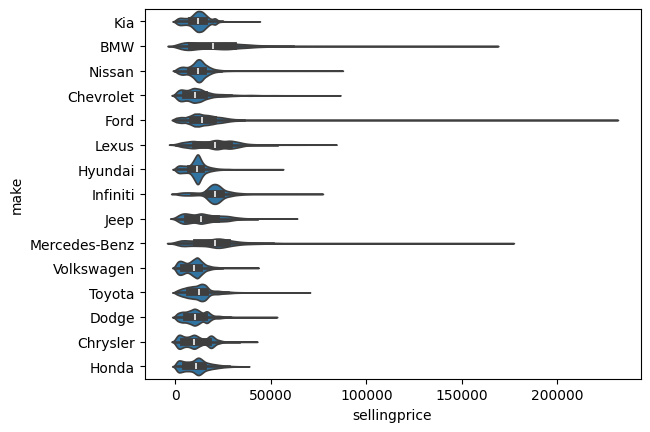

In [20]:
# create a violin plot of car prices 
import seaborn as sns
sns.violinplot(y='make', x='sellingprice', data=popular_cars_df, width=1.2)



In [29]:
# it is shown that in the violin plot, the prices of the cars are not normally distributed, probably under varios factors. Now, we saparate the cars in one make into several groups and see if we can find a nicer price distribution. 
ford_df = popular_cars_df[popular_cars_df['make'] == 'Ford']


In [35]:
grouped_body_ford = ford_df.groupby('body')


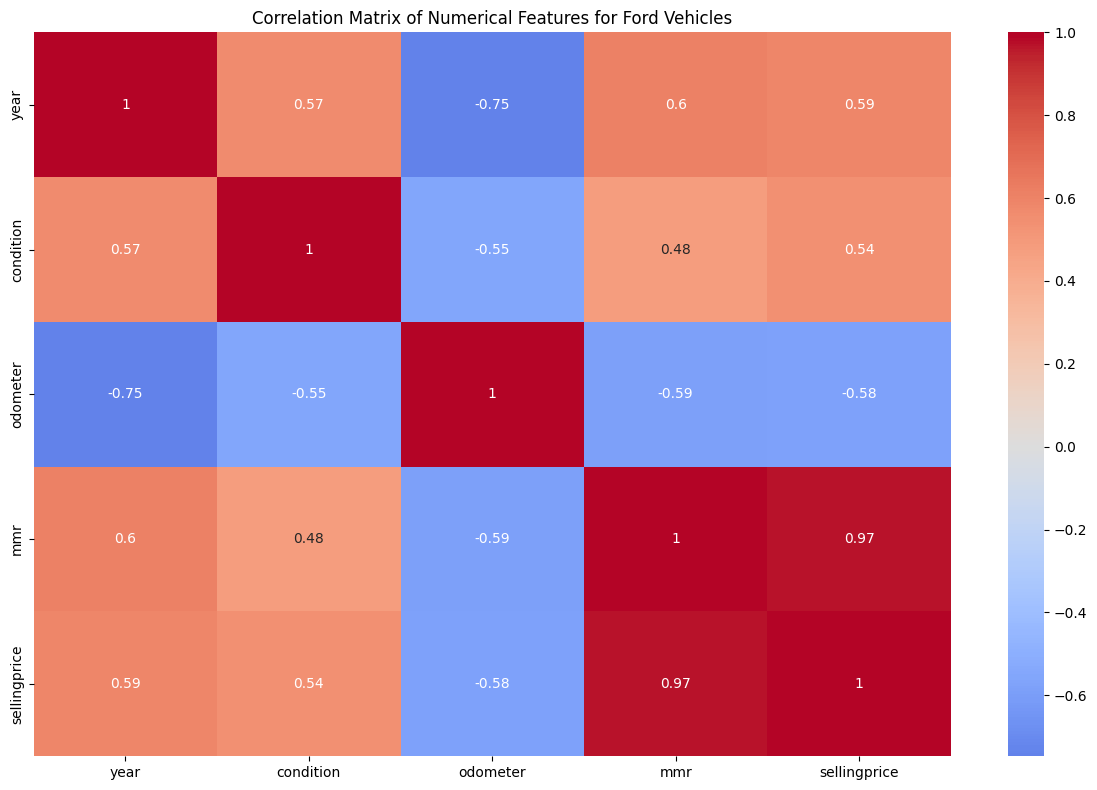


Strongest Feature Correlations:
mmr vs sellingprice: 0.971
year vs odometer: -0.747
year vs mmr: 0.604
year vs sellingprice: 0.588
odometer vs mmr: -0.586


In [33]:
import matplotlib.pyplot as plt

# Calculate correlation matrix for numerical columns in ford_df
numerical_cols = ford_df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = ford_df[numerical_cols].corr()

# Create a heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features for Ford Vehicles')
plt.tight_layout()
plt.show()

# Print the strongest correlations
print("\nStrongest Feature Correlations:")
# Get correlations excluding self-correlations
correlations = []
for i in range(len(numerical_cols)):
    for j in range(i+1, len(numerical_cols)):
        corr = correlation_matrix.iloc[i,j]
        correlations.append((numerical_cols[i], numerical_cols[j], corr))

# Sort by absolute correlation value
correlations.sort(key=lambda x: abs(x[2]), reverse=True)

# Print top 5 correlations
for feat1, feat2, corr in correlations[:5]:
    print(f"{feat1} vs {feat2}: {corr:.3f}")


In [40]:
grouped_body_ford.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
12,2015,Ford,Fusion,SE,Sedan,automatic,3fa6p0hdxfr145753,ca,2.0,5559.0,white,beige,enterprise vehicle exchange / tra / rental / t...,15350,12000,Tue Jan 13 2015 12:00:00 GMT-0800 (PST)
94,2015,Ford,Fusion,SE,Sedan,automatic,3fa6p0h7xfr151689,ca,1.0,4205.0,white,black,enterprise vehicle exchange / tra / rental / t...,14700,12000,Wed Dec 17 2014 15:05:00 GMT-0800 (PST)
939,2012,Ford,Escape,Limited,SUV,automatic,1fmcu0eg0ckb55384,ca,3.5,45035.0,gray,beige,"ford motor credit company,llc pd",15450,14100,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
941,2012,Ford,Edge,SEL,SUV,automatic,2fmdk3jc5cba41602,ca,4.6,20035.0,gray,black,"ford motor credit company,llc pd",20700,20800,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
945,2012,Ford,Edge,SEL,SUV,automatic,2fmdk4jc4cba12890,ca,4.6,41115.0,white,gray,"ford motor credit company,llc pd",19800,22100,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474739,1997,Ford,F-150,XLT,extended cab,automatic,1ftdx17w2vkc34729,tx,1.9,217929.0,green,brown,beck & masten kia of tomball,1575,500,Thu May 28 2015 03:30:00 GMT-0700 (PDT)
491253,2015,Ford,Transit Van,150 Low Roof,transit van,automatic,1ftye1zm0fka20939,fl,4.3,19179.0,white,gray,enterprise veh exchange/rental,22600,22700,Tue Jun 02 2015 02:15:00 GMT-0700 (PDT)
491256,2015,Ford,Transit Van,250 Low Roof,transit van,automatic,1ftyr1zm2fka32837,nv,4.4,13725.0,white,gray,aarts enterprise inc,24300,22500,Fri Jun 05 2015 04:55:00 GMT-0700 (PDT)
496578,2015,Ford,Transit Van,250 High Roof,transit van,automatic,1ftyr2xm9fka53564,nj,1.9,9351.0,white,gray,enterprise veh exchange/rental,25600,19500,Wed Jun 03 2015 02:30:00 GMT-0700 (PDT)


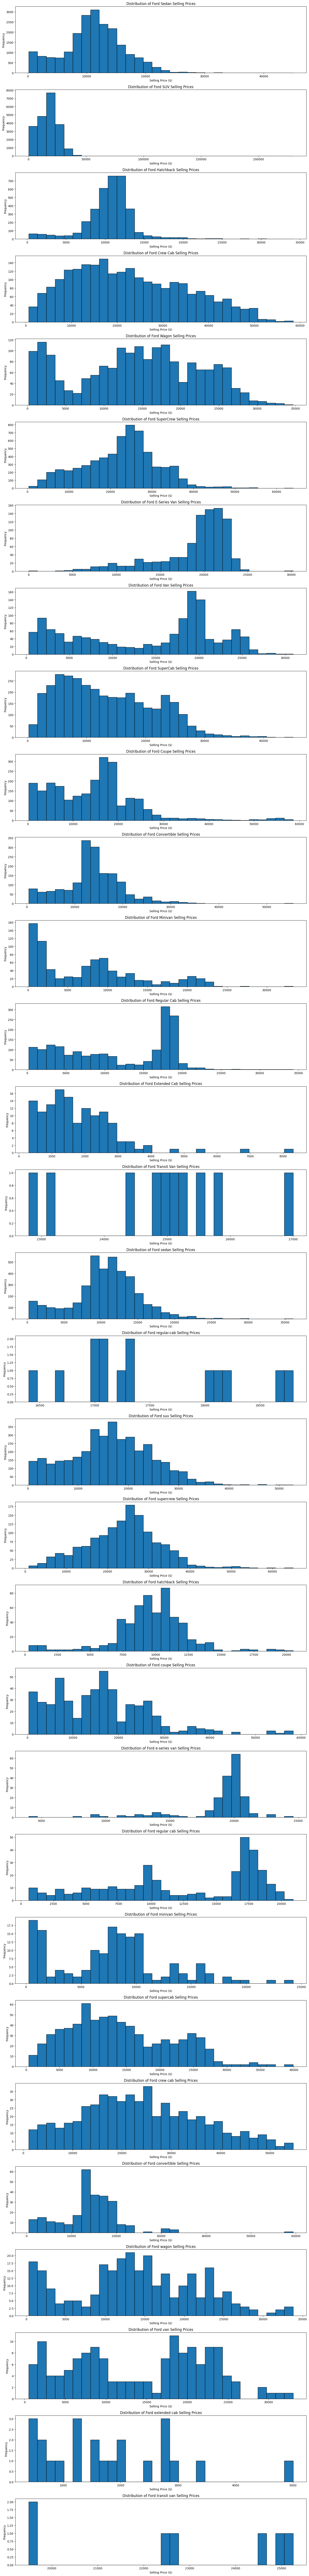


Summary Statistics by Body Type:
                count          mean           std      min       25%      50%  \
body                                                                            
Convertible    1700.0  13616.997059   6206.610998    400.0  11000.00  13500.0   
Coupe          2382.0  14455.022250   9588.606724    200.0   6700.00  14900.0   
Crew Cab       2293.0  22783.768862  12499.754998    650.0  12900.00  21100.0   
E-Series Van    920.0  18892.827174   4131.833196      1.0  17575.00  20200.0   
Extended Cab    132.0   1778.977273   1191.893058    300.0    968.75   1550.0   
Hatchback      3615.0  10529.885201   3219.374030    200.0   9300.00  10800.0   
Minivan         803.0   7574.034869   6499.430833    100.0   1500.00   7200.0   
Regular Cab    1782.0  11488.341751   6921.510341    200.0   4600.00  11100.0   
SUV           20926.0  16991.691198   8613.295337    200.0  11200.00  17300.0   
Sedan         20950.0  11182.675465   5116.515371    175.0   8500.00  11300

In [39]:
grouped_body_ford.head()
# Create a figure with subplots for different body types
unique_bodies = ford_df['body'].unique()
n_bodies = len(unique_bodies)
fig, axes = plt.subplots(n_bodies, 1, figsize=(15, 4*n_bodies))

# Create histogram for each body type
for i, body_type in enumerate(unique_bodies):
    body_data = ford_df[ford_df['body'] == body_type]['sellingprice']
    axes[i].hist(body_data, bins=30, edgecolor='black')
    axes[i].set_title(f'Distribution of Ford {body_type} Selling Prices')
    axes[i].set_xlabel('Selling Price ($)')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Print summary statistics for each body type
print("\nSummary Statistics by Body Type:")
print(grouped_body_ford['sellingprice'].describe())



Ford Sedans Data:
      year  make   model trim   body transmission                vin state  \
12    2015  Ford  Fusion   SE  Sedan    automatic  3fa6p0hdxfr145753    ca   
94    2015  Ford  Fusion   SE  Sedan    automatic  3fa6p0h7xfr151689    ca   
954   2012  Ford   Focus   SE  Sedan    automatic  1fahp3f21cl196273    ca   
971   2012  Ford   Focus  SEL  Sedan    automatic  1fahp3h27cl120201    ca   
1007  2012  Ford  Fiesta    S  Sedan    automatic  3fadp4aj1cm132316    ca   

      condition  odometer  color interior  \
12          2.0    5559.0  white    beige   
94          1.0    4205.0  white    black   
954         3.0   64750.0    red    black   
971         3.7   89575.0    red      tan   
1007        3.0  149962.0  white     gray   

                                                 seller    mmr  sellingprice  \
12    enterprise vehicle exchange / tra / rental / t...  15350         12000   
94    enterprise vehicle exchange / tra / rental / t...  14700         12000   
9

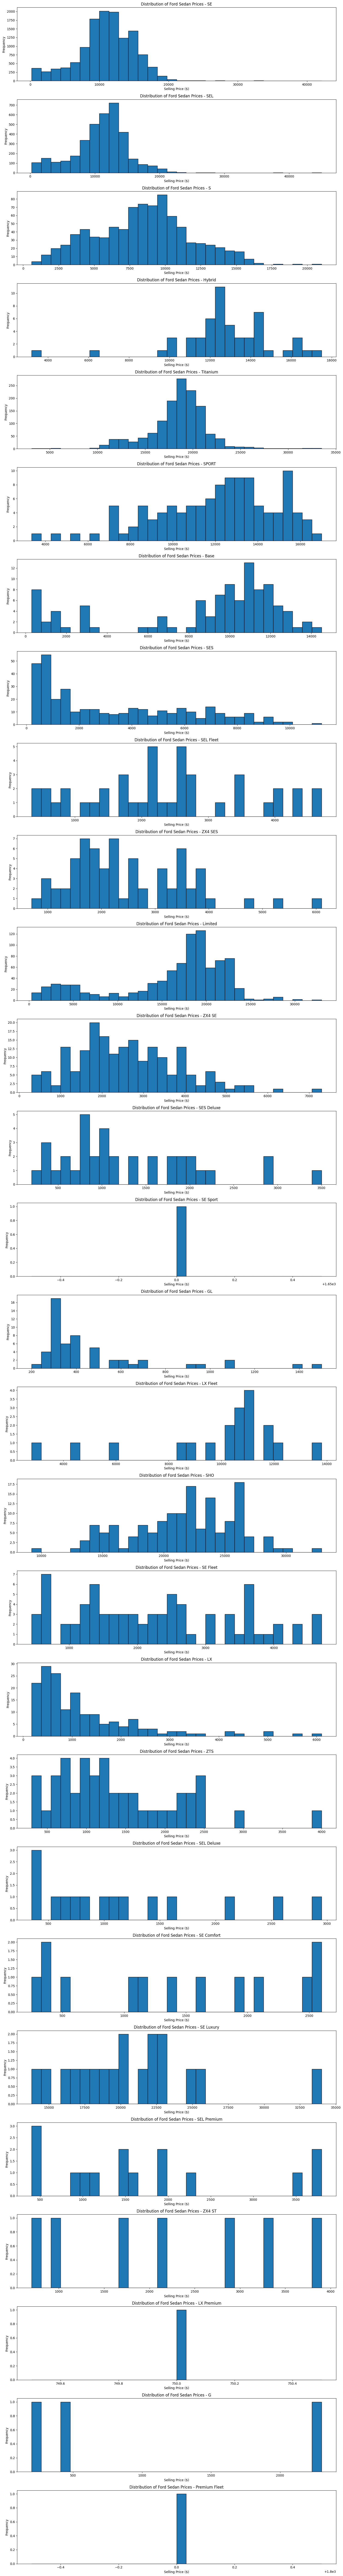


Summary Statistics by Transmission:
               count unique            top   freq
trim                                             
Base             102      1           Base    102
G                  3      1              G      3
GL                54      1             GL     54
Hybrid            54      1         Hybrid     54
LX               166      1             LX    166
LX Fleet          19      1       LX Fleet     19
LX Premium         1      1     LX Premium      1
Limited          886      1        Limited    886
Premium Fleet      1      1  Premium Fleet      1
S                845      1              S    845
SE             12721      1             SE  12721
SE Comfort        13      1     SE Comfort     13
SE Fleet          76      1       SE Fleet     76
SE Luxury         18      1      SE Luxury     18
SE Sport           1      1       SE Sport      1
SEL             3625      1            SEL   3625
SEL Deluxe        15      1     SEL Deluxe     15
SEL Fleet    

In [46]:
# Filter for Ford sedans
ford_sedans = ford_df[ford_df['body'] == 'Sedan']
print("\nFord Sedans Data:")
print(ford_sedans.head())
print("\nNumber of Ford Sedans:", len(ford_sedans))

FEATURE = 'trim'

# Create a figure with subplots for different transmissions
unique_transmissions = ford_sedans[FEATURE].unique()
n_transmissions = len(unique_transmissions)
fig, axes = plt.subplots(n_transmissions, 1, figsize=(15, 4*n_transmissions))

# Create histogram for each transmission type
for i, transmission in enumerate(unique_transmissions):
    transmission_data = ford_sedans[ford_sedans[FEATURE] == transmission]['sellingprice']
    axes[i].hist(transmission_data, bins=30, edgecolor='black')
    axes[i].set_title(f'Distribution of Ford Sedan Prices - {transmission}')
    axes[i].set_xlabel('Selling Price ($)')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Print summary statistics for each transmission
print("\nSummary Statistics by Transmission:")
print(ford_sedans.groupby(FEATURE)[FEATURE].describe())


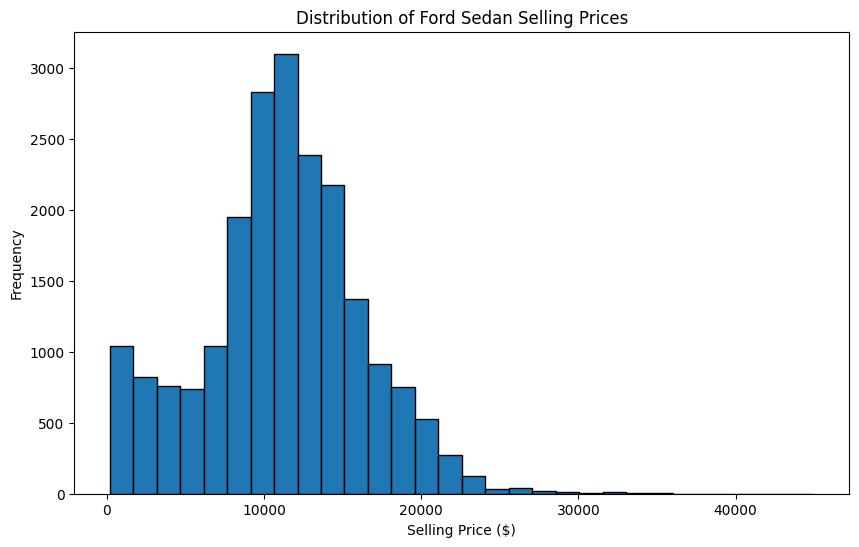

In [42]:
# Create histogram for Ford sedans
plt.figure(figsize=(10, 6))
plt.hist(ford_sedans['sellingprice'], bins=30, edgecolor='black')
plt.title('Distribution of Ford Sedan Selling Prices')
plt.xlabel('Selling Price ($)')
plt.ylabel('Frequency')
plt.show()


In [43]:
ford_sedans.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
12,2015,Ford,Fusion,SE,Sedan,automatic,3fa6p0hdxfr145753,ca,2.0,5559.0,white,beige,enterprise vehicle exchange / tra / rental / t...,15350,12000,Tue Jan 13 2015 12:00:00 GMT-0800 (PST)
94,2015,Ford,Fusion,SE,Sedan,automatic,3fa6p0h7xfr151689,ca,1.0,4205.0,white,black,enterprise vehicle exchange / tra / rental / t...,14700,12000,Wed Dec 17 2014 15:05:00 GMT-0800 (PST)
954,2012,Ford,Focus,SE,Sedan,automatic,1fahp3f21cl196273,ca,3.0,64750.0,red,black,remarketing by ge/chase lease remarketing co,8150,8500,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
971,2012,Ford,Focus,SEL,Sedan,automatic,1fahp3h27cl120201,ca,3.7,89575.0,red,tan,wells fargo dealer services,7475,9000,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
1007,2012,Ford,Fiesta,S,Sedan,automatic,3fadp4aj1cm132316,ca,3.0,149962.0,white,gray,enterprise fm exchange/tra/lease,3650,3200,Tue Dec 16 2014 12:00:00 GMT-0800 (PST)


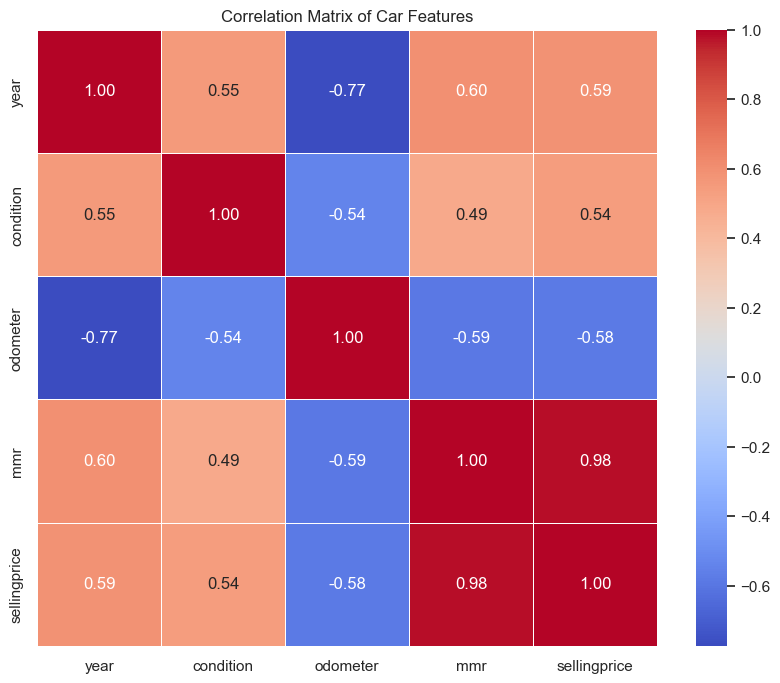

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('car_prices_corrected.csv', on_bad_lines='warn')
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Car Features')
plt.show()



<Figure size 1500x1500 with 0 Axes>

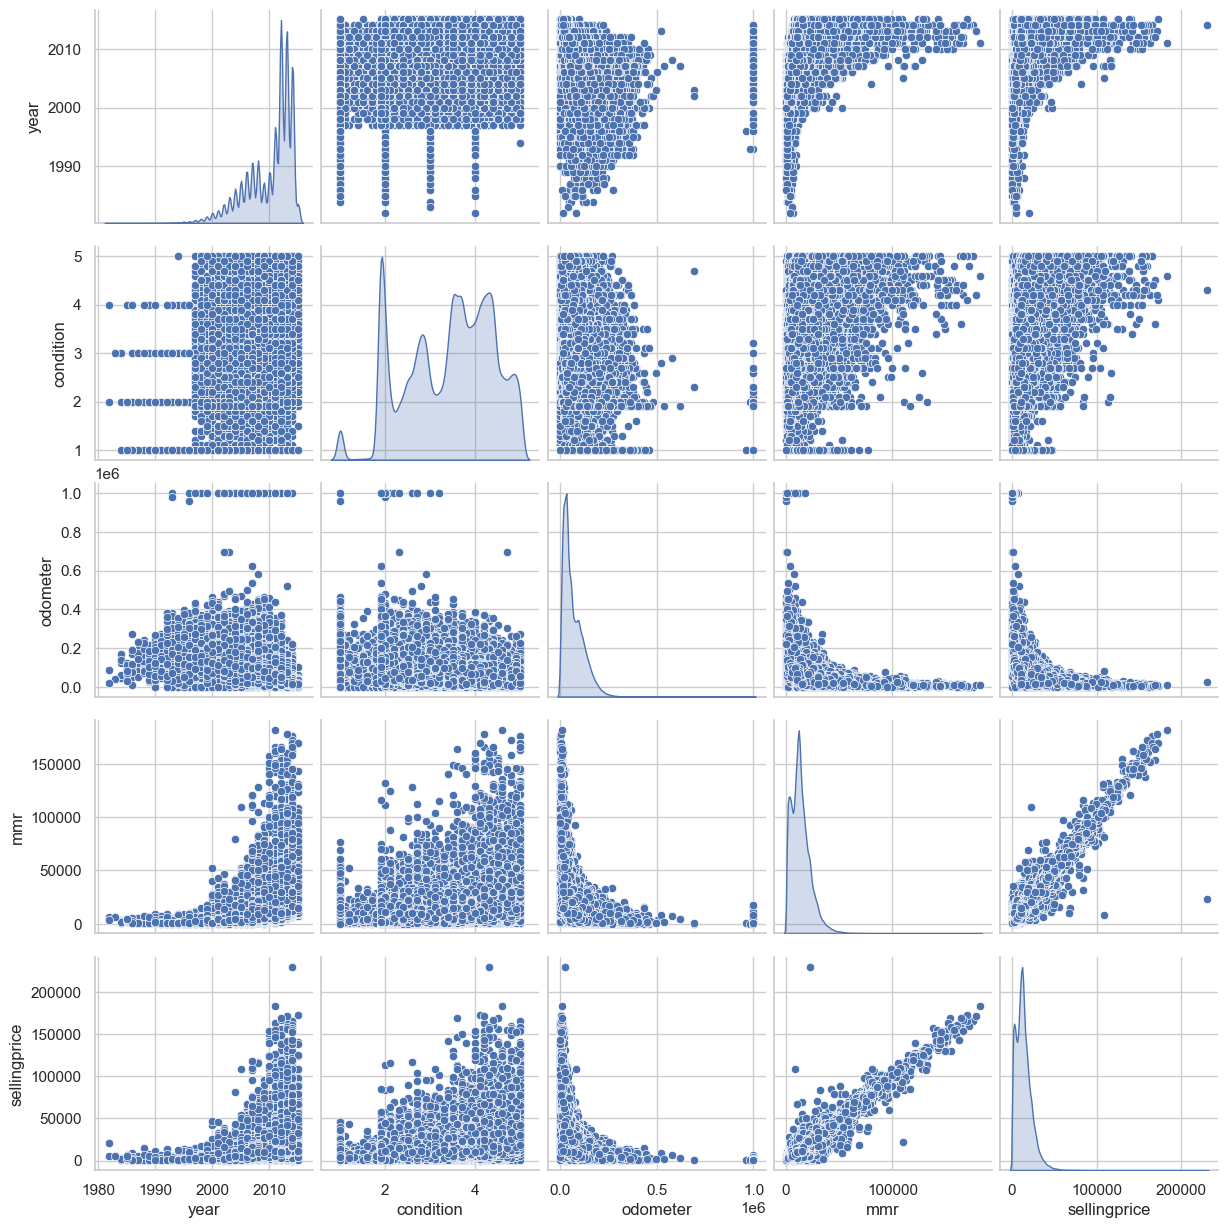

In [14]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde');

   year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca        4.5    1331.0   gray    black   
3  yv1612tb4f1310987    ca        4.1   14282.0  white    black   
4  wba6b2c57ed129731    ca        4.3    2641.0   gray    black   

                                   seller    mmr  sellingprice  \
0                 kia motors america, inc  20500         21500   
1                 kia motors america, 

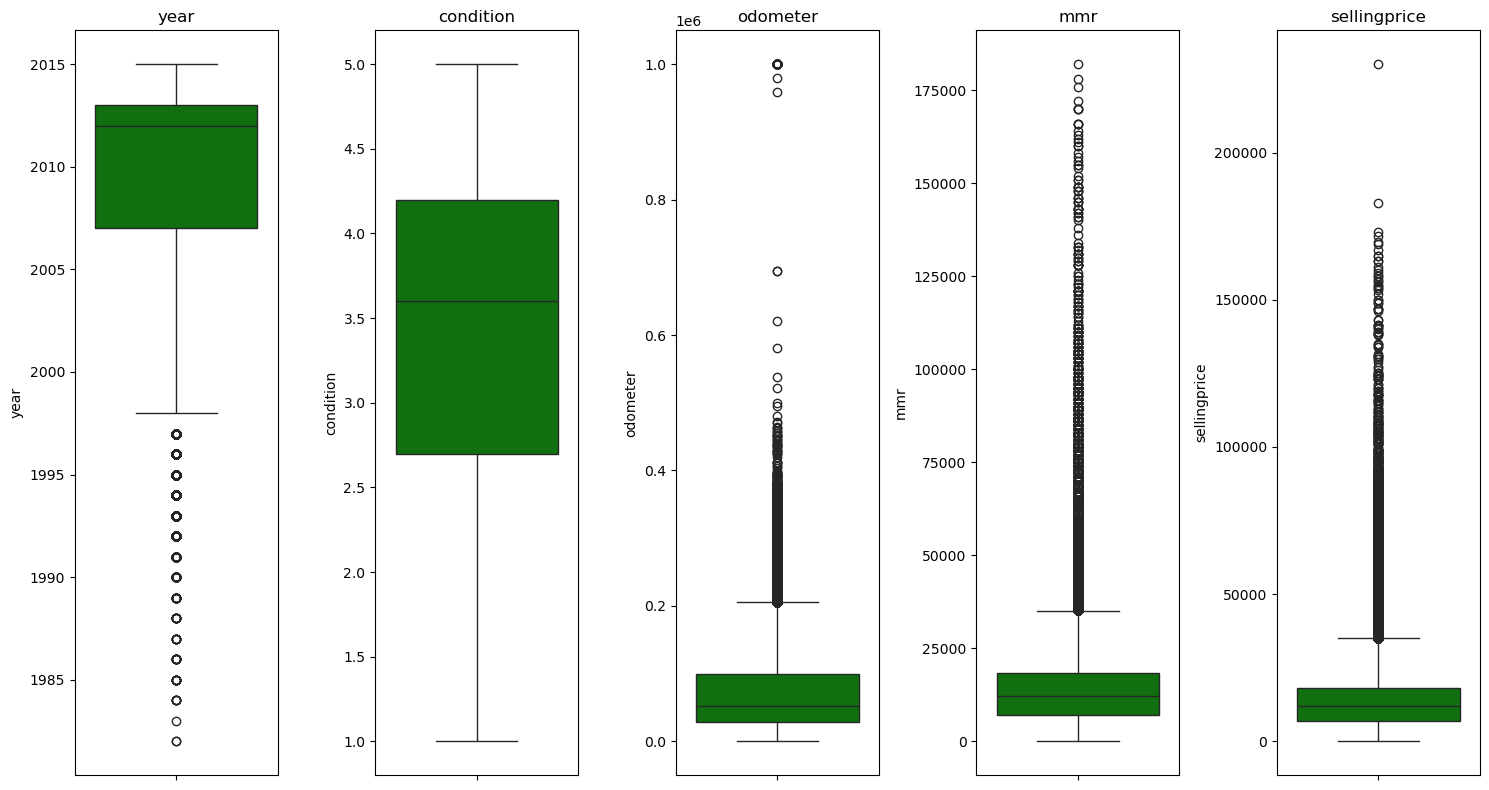

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('car_prices_corrected.csv', on_bad_lines='warn')

# Display the first few rows to understand the data structure
print(df.head())

# Define numerical columns to analyze
features = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']  # Add other numerical columns if needed

# Create boxplots for each numerical feature
plt.figure(figsize=(15, 8))  # Adjust figure size as needed
for i, feature in enumerate(features):
    plt.subplot(1, len(features), i + 1)  # Create subplots in a single row
    sns.boxplot(y=df[feature], color='green', orient='v')  # Boxplot for each feature
    plt.title(feature)  # Add a title for each subplot
    plt.tight_layout()

# Show the plots
plt.show()


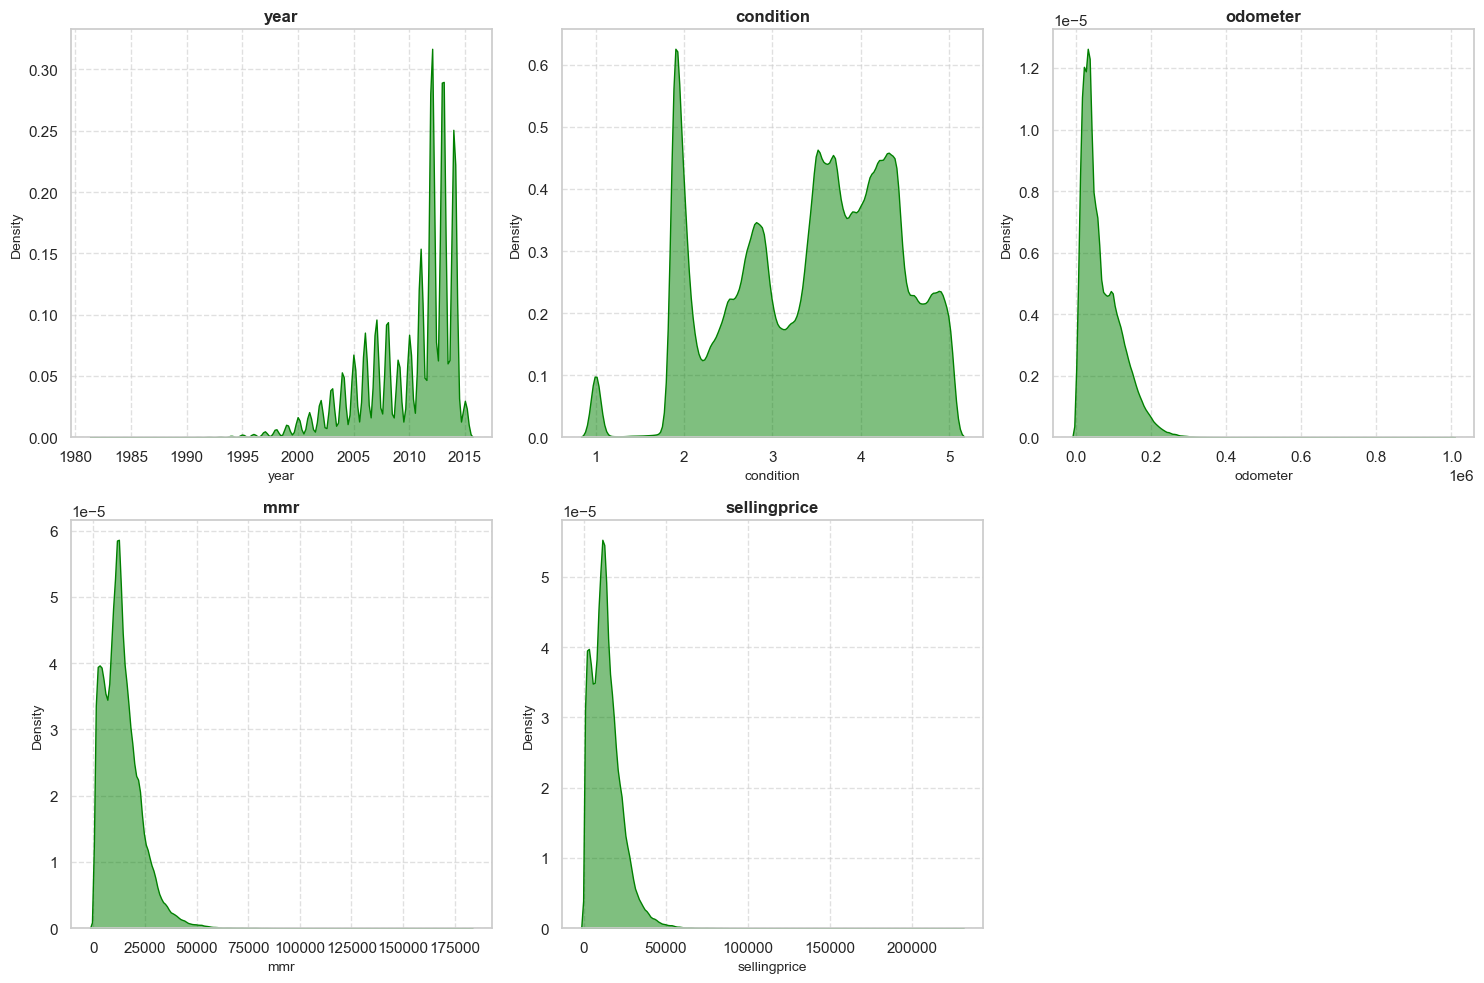

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('car_prices_corrected.csv', on_bad_lines='warn')

# Define numerical features

# Set a consistent style
sns.set_theme(style="whitegrid", font="sans-serif")

# Create KDE plots for each numerical feature
plt.figure(figsize=(15, 10))  # Adjust figure size for better layout
for i in range(len(features)):
    plt.subplot(2, (len(features) + 1) // 2, i + 1)  # Dynamic layout: 2 rows
    sns.kdeplot(x=df[features[i]], color='green', fill=True, alpha=0.5, bw_adjust=0.8)  # KDE with styling
    plt.title(features[i], fontsize=12, fontweight='bold')  # Add title for each subplot
    plt.xlabel(features[i], fontsize=10)  # Add x-axis label
    plt.ylabel('Density', fontsize=10)  # Add y-axis label
    plt.grid(True, linestyle='--', alpha=0.6)  # Add gridlines

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


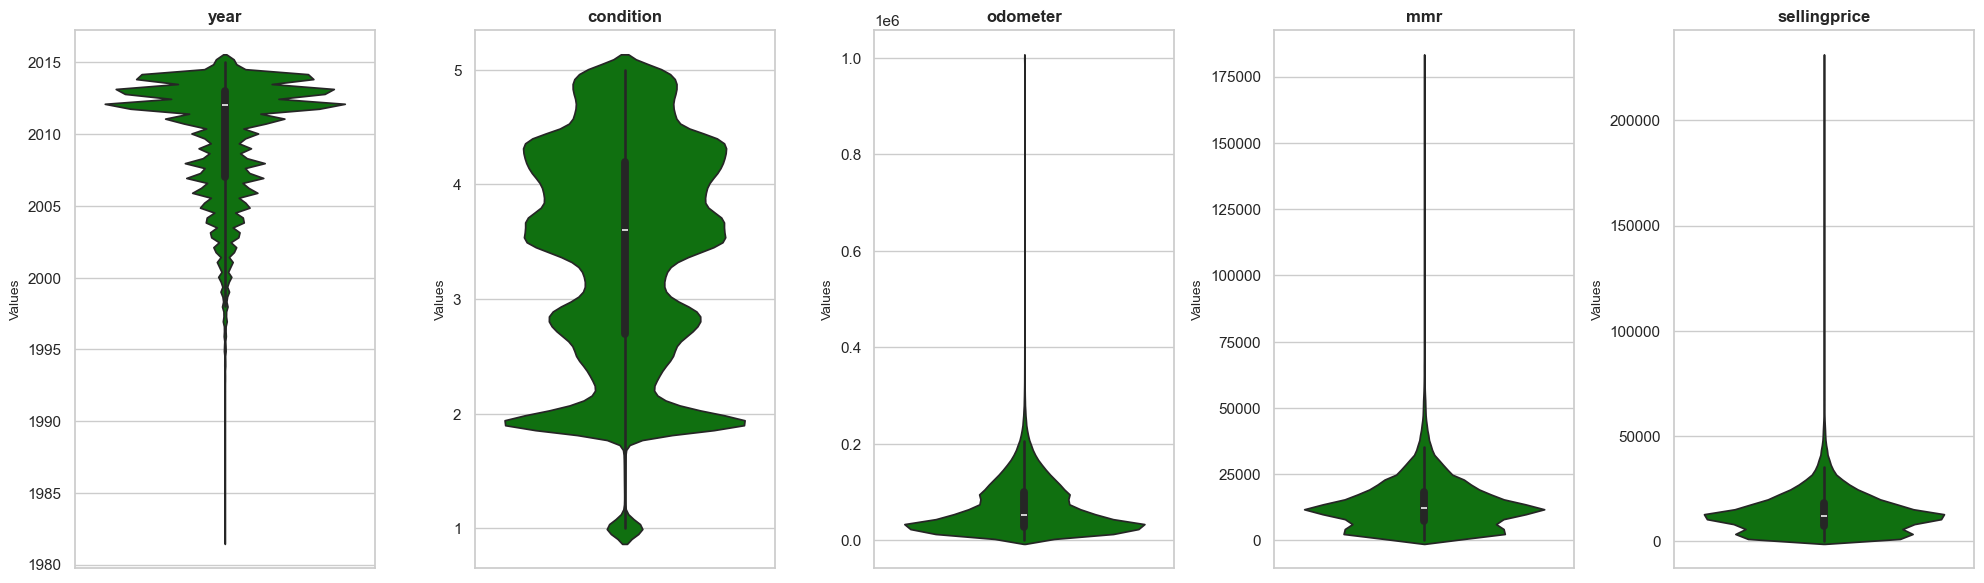

In [10]:
plt.figure(figsize=(20, 6))  # Make the figure wider
for i in range(len(features)):
    plt.subplot(1, len(features), i + 1)  # Use one row, with as many columns as features
    sns.violinplot(y=df[features[i]], color='green', orient='v')  # Vertical orientation
    plt.title(features[i], fontsize=12, fontweight='bold')  # Add title for each plot
    plt.ylabel('Values', fontsize=10)  # Y-axis label

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

By the above analysis, we can see that we can see the grouping is roughly based on the body, make, and trim, where each of them is a normal distribution. Thus, we just need to predict the mean and variance of the normal distribution based on those values. 

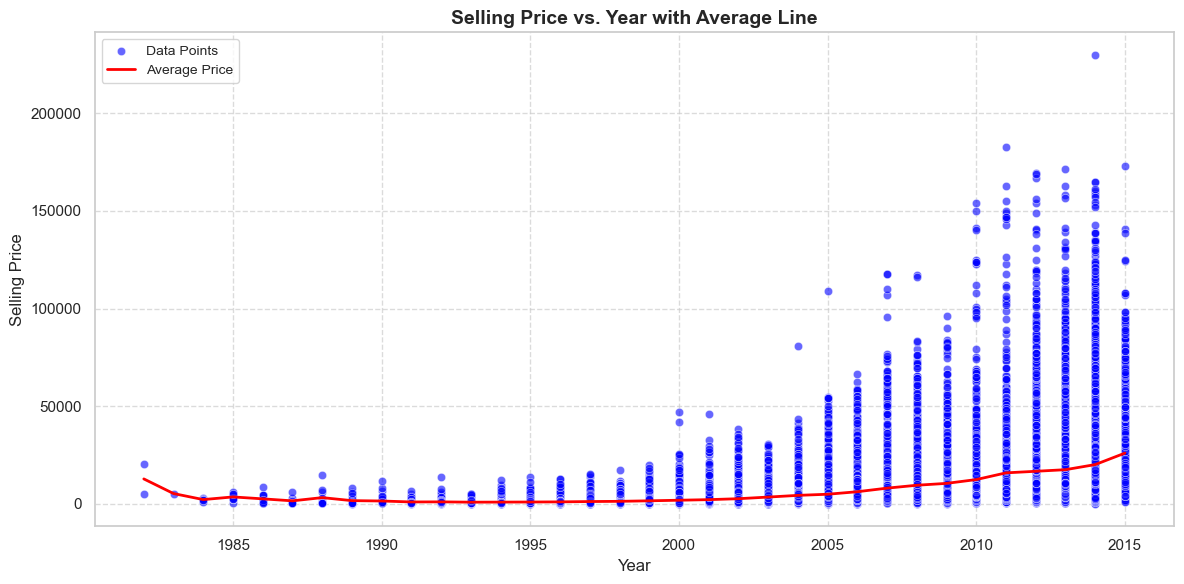

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('car_prices_corrected.csv', on_bad_lines='warn')

# Prepare the data for the average line
average_price_per_year = df.groupby('year')['sellingprice'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='year', y='sellingprice', color='blue', alpha=0.6, label='Data Points')  # Scatter plot
sns.lineplot(data=average_price_per_year, x='year', y='sellingprice', color='red', label='Average Price', linewidth=2)  # Average line

# Customize the plot
plt.title('Selling Price vs. Year with Average Line', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


Hypothesis test for the car color's influence on the value f the car